In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os

In [2]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),   # обрезаем до 244, потому что в imagenet из-я 224x224
        transforms.RandomHorizontalFlip(),   # случайно переворачиваем либо не переворачиваем изображение
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),    # обрезаем по центру
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './hymenoptera_data'
# В папке датасета должны быть n папок для n классов в формате .png. 
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей

train_dataloader = torch.utils.data.DataLoader(
    image_datasets["train"], batch_size=32,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    image_datasets["val"], batch_size=128   # мы не обучаем сетку --> нужно меньше памяти для прохода по сети
)

loaders = {
    "train": train_dataloader,
    "valid": val_dataloader
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)   # размеры обучающей и валидационной выборок
class_names = image_datasets['train'].classes

{'train': 244, 'val': 153}


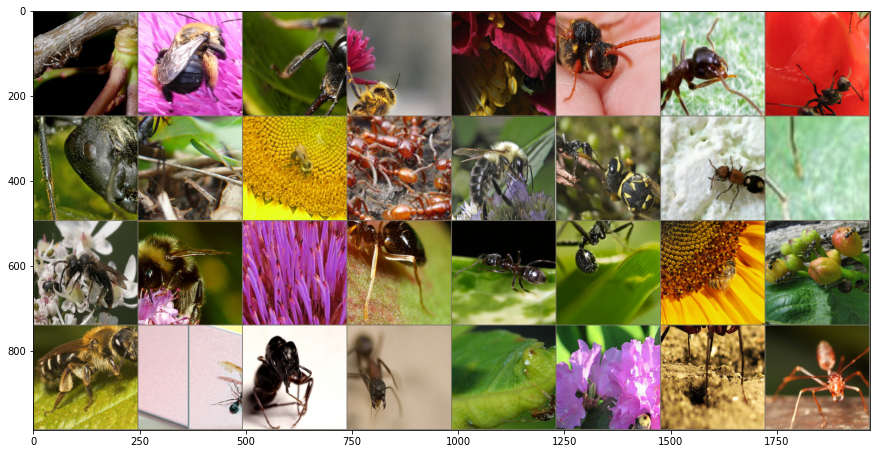

In [3]:
from matplotlib import pyplot as plt

def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(loaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)
imshow(out)